In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
# Create a two-dimensional matrix of dimention 100 * 150 containing 15,000 entries with value 0. 
arr = np.zeros([100, 150])

# Set the entry (50,75) to be 1.
arr[50, 75] = 1

# To store all arrays
total_arr = np.zeros([100, 150, 60])
total_arr[:, :, 0] = np.zeros(arr.shape)

# Store total count and difference
no_ones = np.array([1])
no_iter = np.array([0])
no_diff = np.array([])

flag = True
n_iter = 0
while(flag):
    n_iter += 1
    temp_arr = np.zeros(arr.shape)
    for iter_i in np.arange(8):
        i, j, k, l = np.random.randint(100), np.random.randint(150), np.random.randint(100), np.random.randint(150)
        arr[i][j], arr[k][l] = arr[k][l], arr[i][j]
    for i in np.arange(arr.shape[0]):
        for j in np.arange(arr.shape[1]):
            if (arr[i][j] == 1):
                for k in np.arange(np.maximum(i-2, 0), np.minimum(i+3, arr.shape[0])):
                    for l in np.arange(np.maximum(j-2, 0), np.minimum(j+3, arr.shape[1])):
                        if ((abs(i-k) == 1 and abs(j-l) <= 1) or (abs(i-k) <= 1 and abs(j-l) == 1)):
                            if(temp_arr[k][l] == 0):
                                temp_arr[k][l] = np.random.choice([0, 1], p=[0.75, 0.25])
                        elif ((abs(i-k) == 2 and abs(j-l) <= 2) or (abs(i-k) <= 2 and abs(j-l) == 2)):
                            if(temp_arr[k][l] == 0):
                                temp_arr[k][l] = np.random.choice([0, 1], p=[0.75, 0.25])
    arr = np.maximum(arr, temp_arr)
    total_arr[:, :, n_iter] = arr
    print(n_iter, np.sum(arr))
    # if n_iter == 1: flag = False
    no_diff = np.append(no_diff, np.sum(arr) - no_ones[-1])
    no_ones = np.append(no_ones, np.sum(arr))
    no_iter = np.append(no_iter, n_iter)
    
    if (n_iter == 60): flag = False
    if ((arr == np.ones([100, 150])).all()):
        flag = False
total_arr = total_arr[:, :, :n_iter+1]
print(arr)
print(n_iter)

1 11.0
2 40.0
3 82.0
4 151.0
5 253.0
6 375.0
7 529.0
8 735.0
9 969.0
10 1306.0
11 1675.0
12 2113.0
13 2648.0
14 3343.0
15 4262.0
16 5446.0
17 6879.0
18 8412.0
19 9902.0
20 11213.0
21 12345.0
22 13244.0
23 13975.0
24 14541.0
25 14882.0
26 14983.0
27 15000.0
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
27


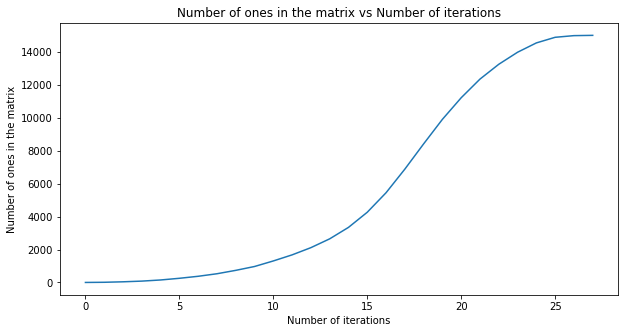

In [3]:
plt.figure(figsize = [10 ,5])
plt.plot(no_iter, no_ones)
plt.title("Number of ones in the matrix vs Number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Number of ones in the matrix")
plt.savefig("Plot_1.png", dpi = 100);

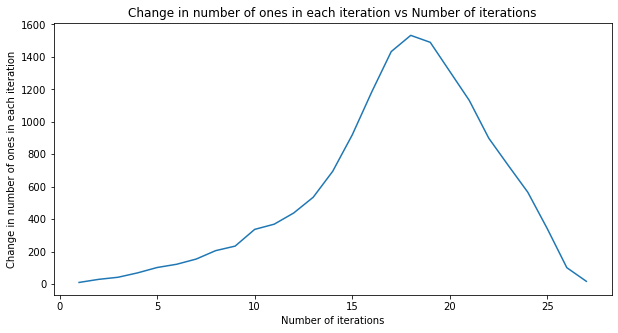

In [4]:
plt.figure(figsize = [10 ,5])
plt.plot(no_iter[1:], no_diff)
plt.title("Change in number of ones in each iteration vs Number of iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Change in number of ones in each iteration")
plt.savefig("Plot_2.png", dpi = 100);

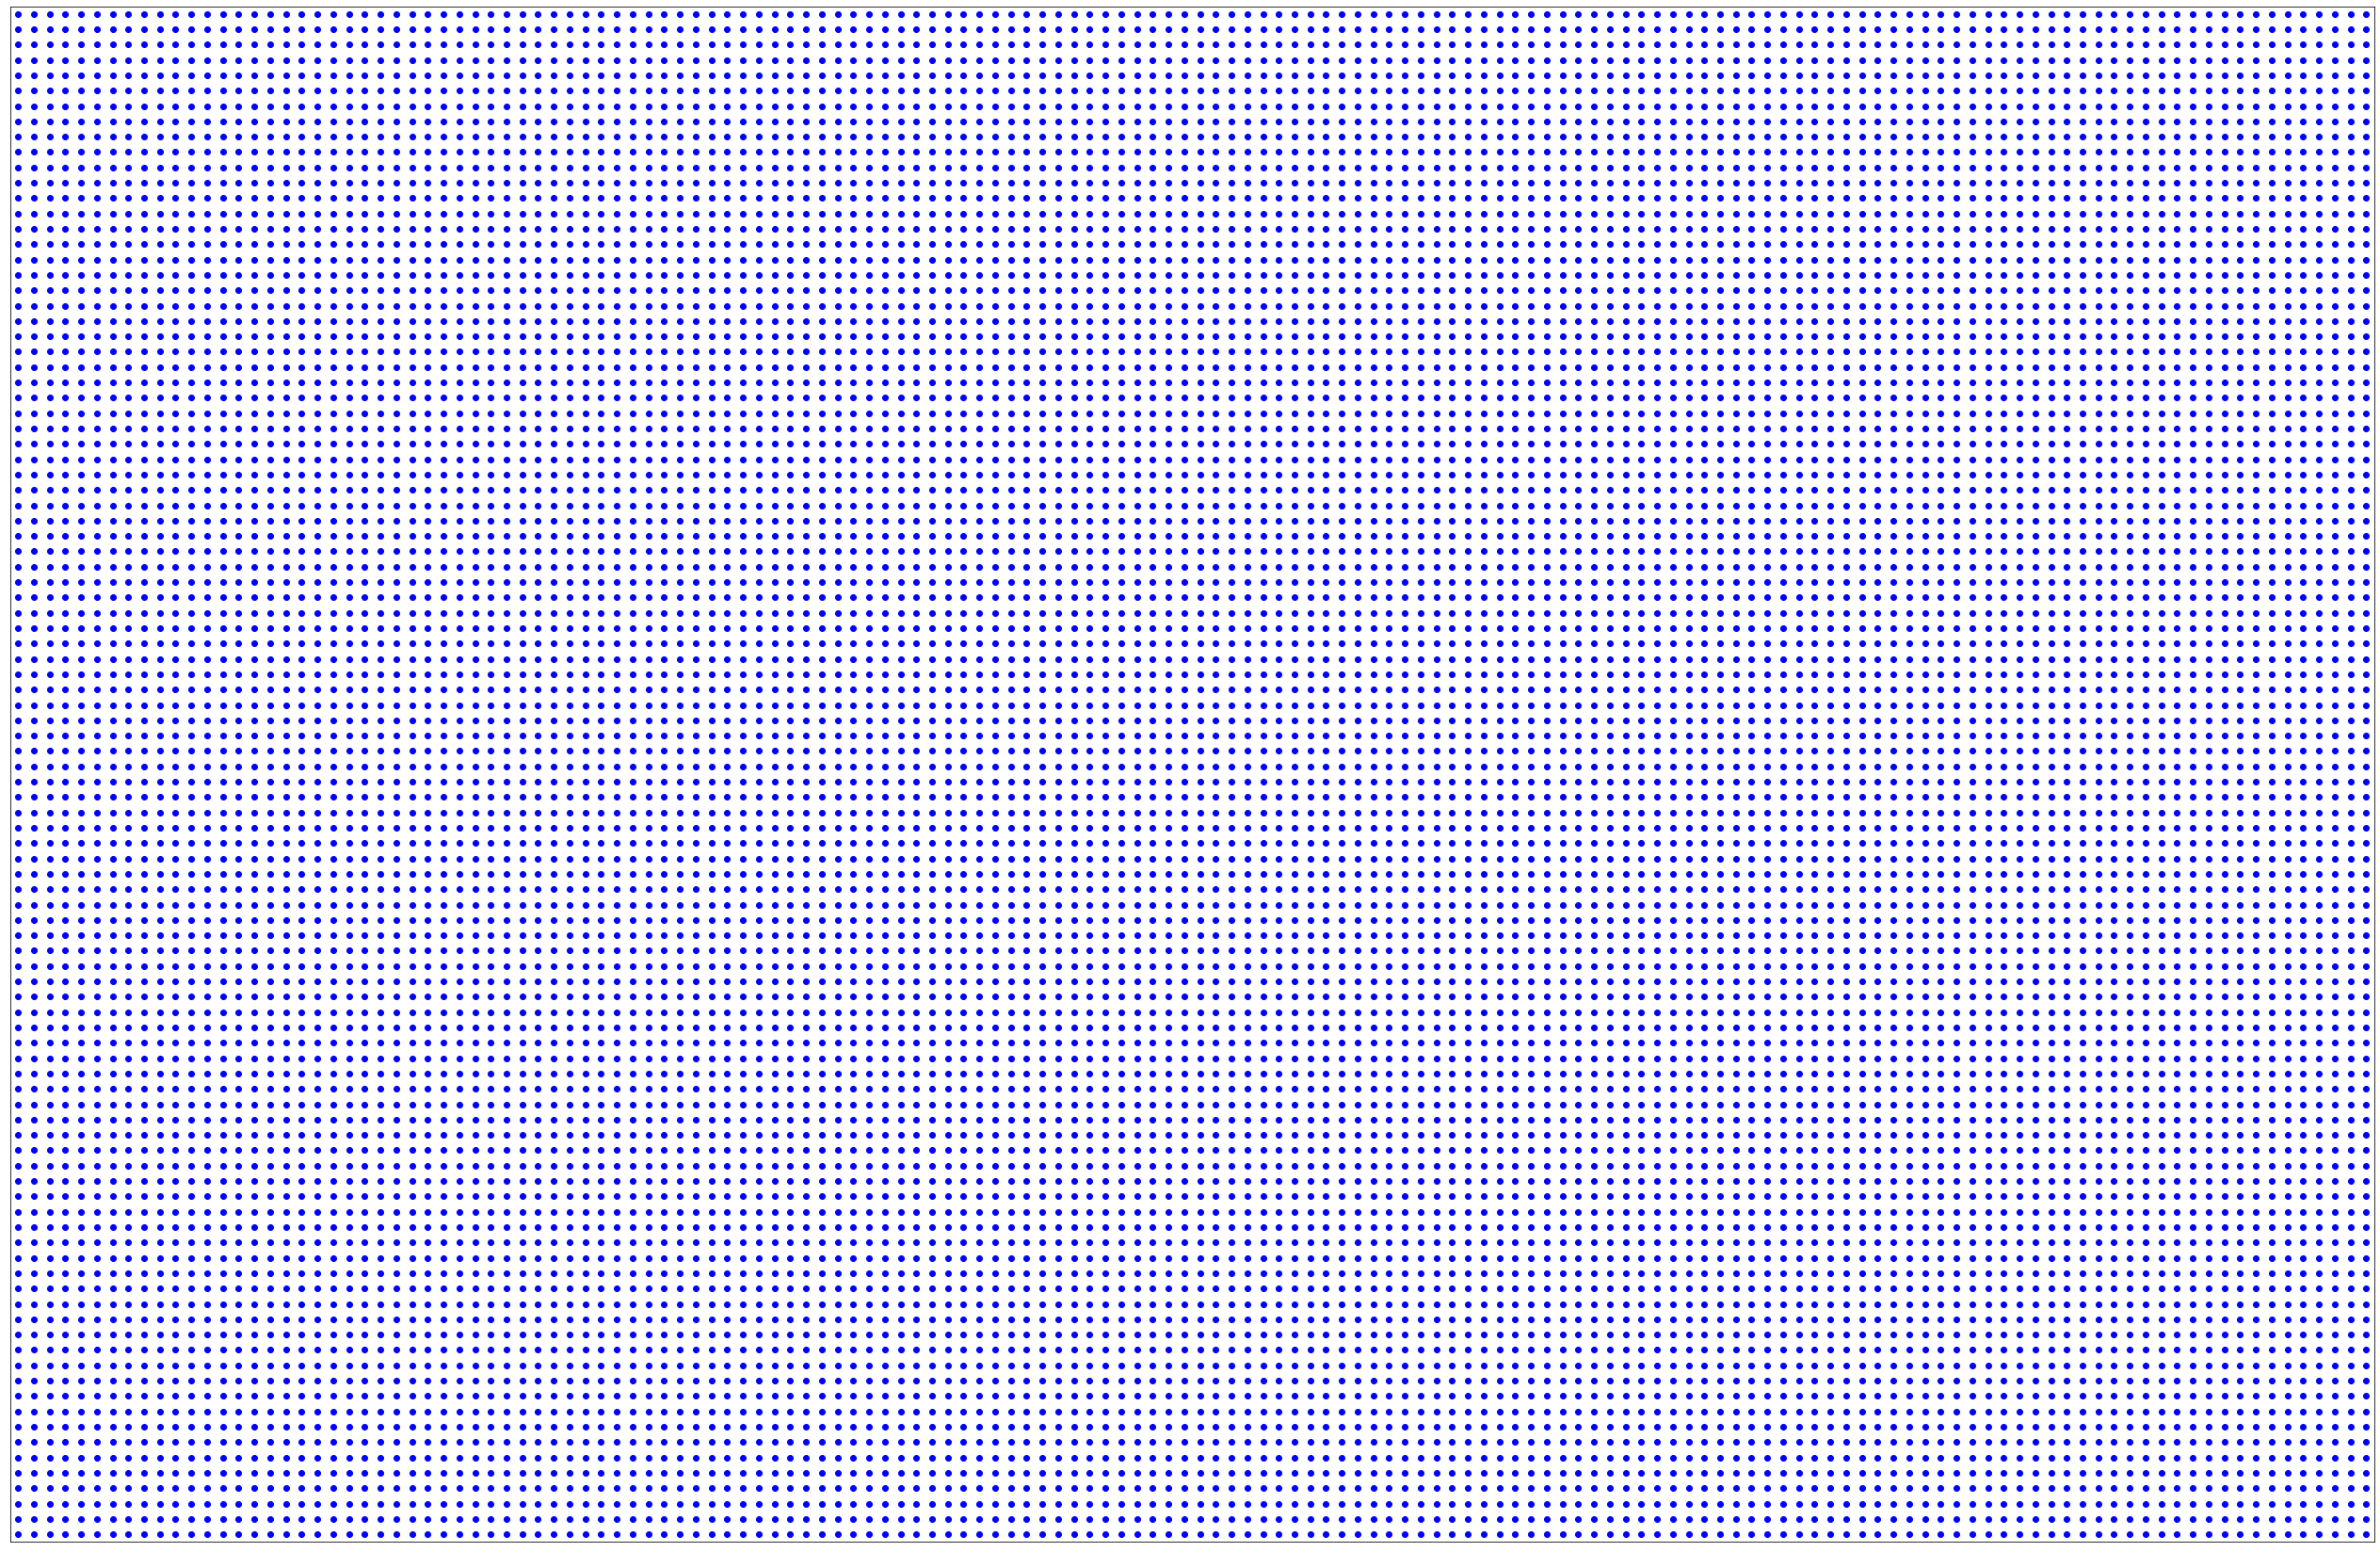

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize = [45, 30])
ax = plt.axes(xlim=(-0.5, 149.5), ylim=(-0.5, 99.5))
plt.xticks([])
plt.yticks([])
line, = ax.plot([], [], 'bo', ms=6)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(j):
    x = np.tile(np.arange(150), 100)
    y = np.array([])
    for i in np.arange(100):
        y = np.append(y, -1 + np.sign(total_arr[i, :, j]) + i * total_arr[i, :, j])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames = n_iter + 1, blit = True, init_func = init, repeat = True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
writervideo = animation.FFMpegWriter(fps = 2, extra_args=['-vcodec', 'libx264'])
anim.save('Virus Spread.mp4', writer = writervideo);